In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
car_train = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv')
car_train.sample(5)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
2042,V-2042242Z,Smart ForTwo,economy,petrol,4.60,2017,124372,2014,52.21,engine_check
335,A-3756325r,VW Tiguan,economy,petrol,4.12,2016,109459,2019,37.48,break_bug
568,b15966462n,Kia Rio X-line,economy,petrol,3.98,2014,72725,2019,33.16,wheel_shake
505,i-1106718P,Tesla Model 3,premium,electro,4.72,2015,75786,2017,119.84,engine_ignition
2336,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check


In [3]:
rides_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv')
rides_info.sample(5)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
643820,V16808405V,t12980699M,Z1d,2020-01-11,2.12,62,739,35,73.000000,2,1869.037617,0,-11.433614,-0.000
137586,s20879491c,J30439877U,U1X,2020-03-08,2.89,65,581,48,139.666739,1,2129.564969,0,-13.420831,-5.559
715870,P18328419v,y-7520188c,y1N,2020-01-19,3.74,25,246,50,69.000000,2,1282.948769,0,0.377504,0.000
614975,U72032422y,r12315595Q,m1O,2020-02-01,3.64,22,301,68,135.730680,0,1543.868510,0,8.732781,0.000
108476,P38618742Q,H22971297C,K1f,2020-02-09,1.34,42,666,47,53.000000,0,1842.895896,0,-11.842514,5.034


In [4]:
driver_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv')
driver_info.sample(5)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
6521,47,7.5,182,1.0,S19033373y,0,2020-3-28
8718,40,8.2,974,9.0,H74042965w,0,2019-2-30
7927,45,7.9,778,5.0,c80605673j,0,2019-4-22
6597,39,8.6,651,8.0,S17903865S,1,2020-8-3
5038,24,7.6,694,11.0,f22987070B,0,2019-5-15


In [5]:
fix_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/fix_info.csv')
fix_info.sample(5)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
110408,f-1042769Z,RC,2020-12-27 20:30,reparking,1.0,25
86163,R-6844153a,SH,2019-2-22 1:19,repair,8.2,53
10194,X-5337958G,FF,2019-9-24 8:37,reparking,1.0,29
36736,F14063148j,NF,2019-9-28 3:57,refuel,1.0,18
104071,s13606781f,TF,2019-12-6 14:11,repair,6.0,16


## Основной датасет

In [6]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB


In [6]:
# 2023 - крайний год. Возраст total_car_age и срок эксплуатации в сервисе автомобиля будут эффективнее, чем номинальная дата
car_train['total_car_age'] = 2023 - car_train['year_to_start']
car_train['servis_car_age'] = 2023 - car_train['year_to_work']

In [7]:
car_train.drop(columns=['year_to_start', 'year_to_work'], inplace=True, errors = 'ignore')

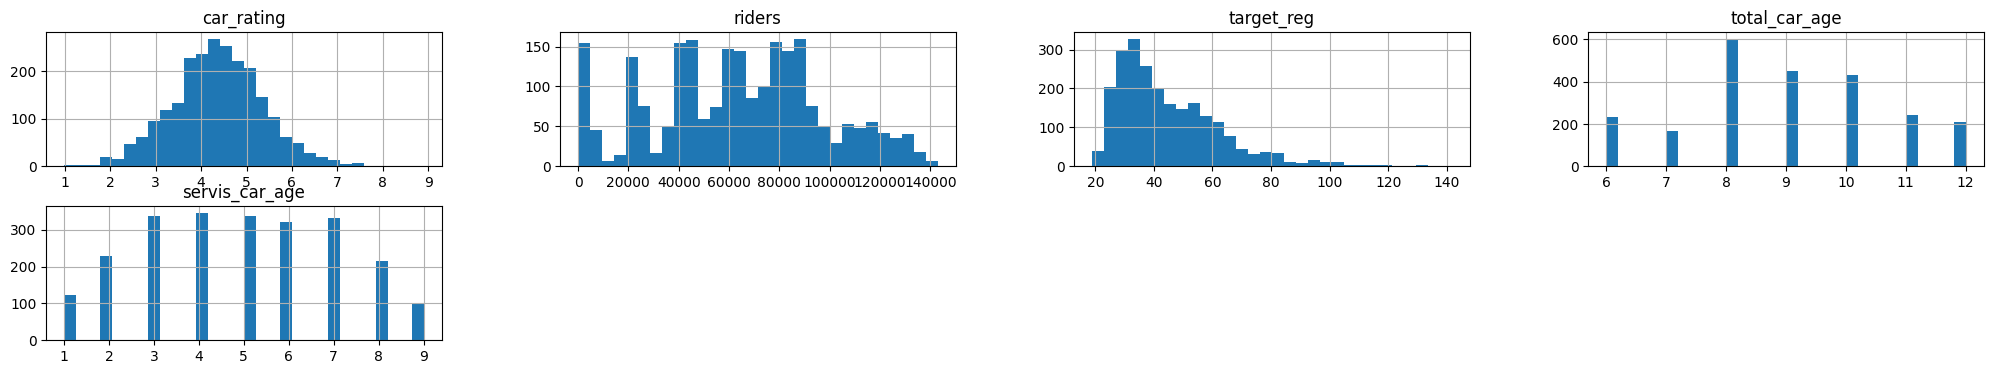

In [8]:
car_train.hist(figsize=(25, 4), layout=(-1, 4), bins=30);

### Информация про поездки

In [10]:
rides_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739500 entries, 0 to 739499
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            739500 non-null  object 
 1   car_id             739500 non-null  object 
 2   ride_id            739500 non-null  object 
 3   ride_date          739500 non-null  object 
 4   rating             739500 non-null  float64
 5   ride_duration      739500 non-null  int64  
 6   ride_cost          739500 non-null  int64  
 7   speed_avg          739500 non-null  int64  
 8   speed_max          736139 non-null  float64
 9   stop_times         739500 non-null  int64  
 10  distance           739500 non-null  float64
 11  refueling          739500 non-null  int64  
 12  user_ride_quality  736872 non-null  float64
 13  deviation_normal   739500 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 79.0+ MB


speed_max = 736139 non-null от ощего 739500. (739500 - 736139) / 739500 * 100 = 0.45%, что составляет несущественную часть - решение удалить; 

user_ride_quality = 736872 от ощего 739500. (739500 - 736872) / 739500 * 100 = 0.35%, что составляет несущественную часть - решение удалить

In [9]:
rides_info = rides_info.dropna(subset=['speed_max']).reset_index(drop=True)
rides_info = rides_info.dropna(subset=['user_ride_quality']).reset_index(drop=True)

In [10]:
rides_info['ride_date'] = pd.to_datetime(rides_info['ride_date'])

# не нашел применения 
#rides_info['ride_date'] = rides_info['ride_date'].dt.month

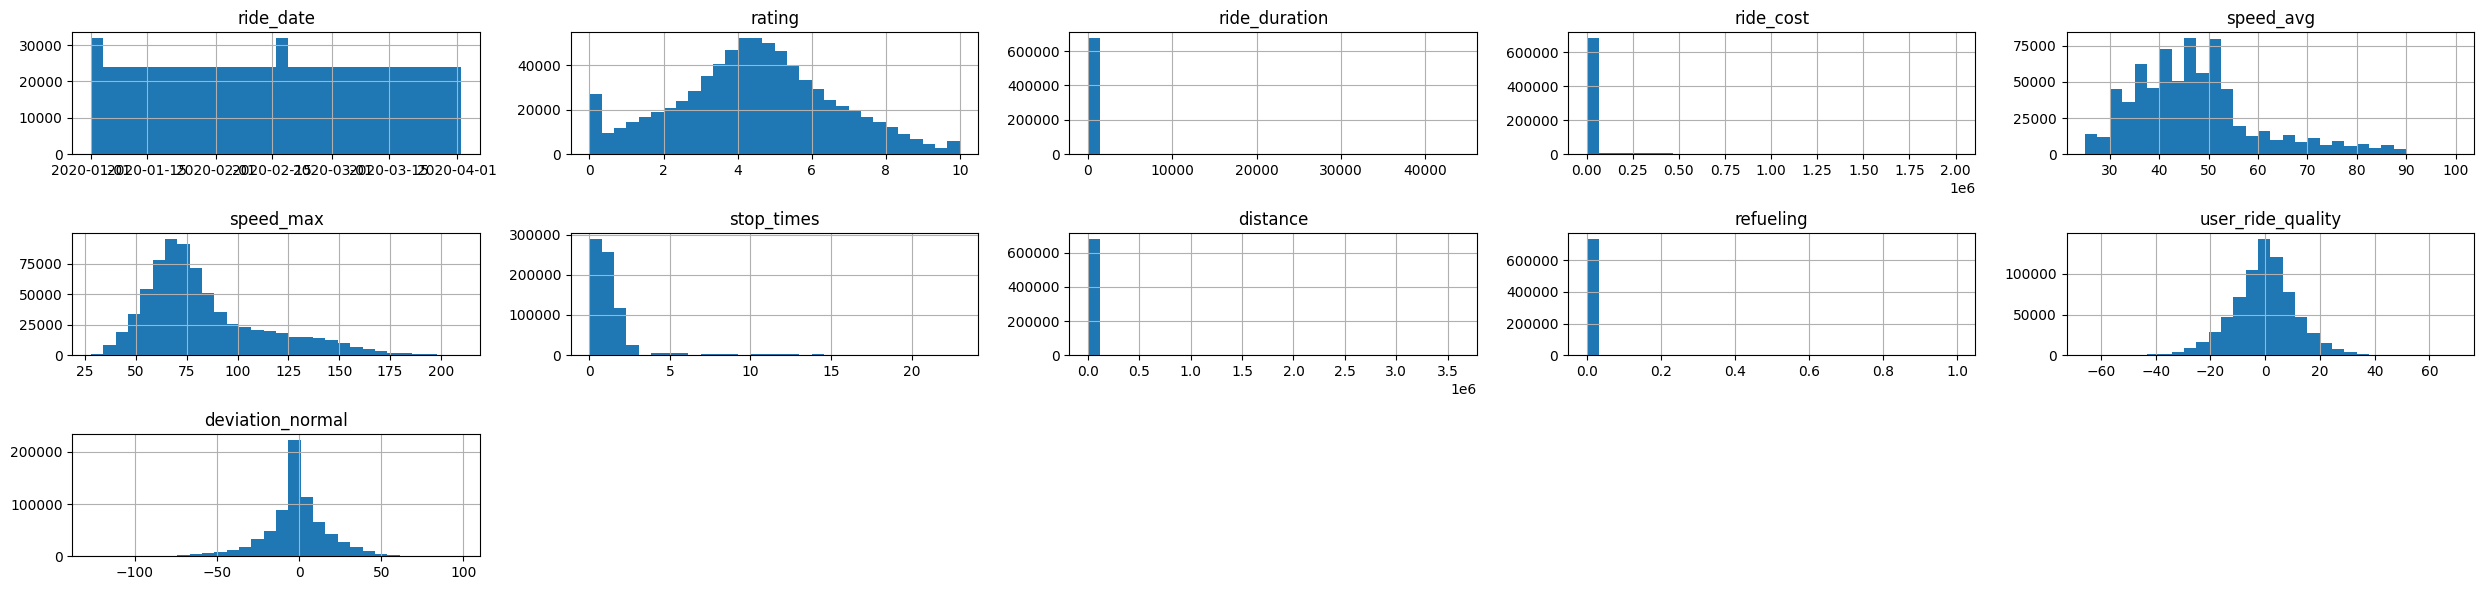

In [11]:
rides_info.hist(figsize=(25, 6), layout=(-1, 5), bins=30);
plt.tight_layout()

In [12]:
speed_max_upper_quartile = lambda x: x.quantile(0.75) # функция подсчета верхнего квантиля
rides_info = rides_info.sort_values(by=['car_id', 'ride_date']) # Убедимся, что дата отсортирована

# Вычисление первой производной
rides_info['deviation_normal_diff'] = rides_info.groupby('car_id')['deviation_normal'].diff()

# Порог для определения значительного изменения
threshold = rides_info['deviation_normal_diff'].std()

# Определение точек перегиба
rides_info['shift_car_devnorm'] = np.where(rides_info['deviation_normal_diff'].abs() > threshold, 1, 0)

rides_info_gr = rides_info.groupby('car_id', as_index=False).agg(
   min_car_rating = ('rating', 'min'),
   mean_car_rating = ('rating', 'mean'),
   sum_car_distance = ('distance', 'sum'),
   max_car_speed = ('speed_max', 'max'),
   count_car_rides = ('ride_id', 'count'),
   upquart_car_speed = ('speed_max', speed_max_upper_quartile),
   start_car_devnorm = ('deviation_normal', 'first')
)
rides_info_gr.sample(5)

,car_id,min_car_rating,mean_car_rating,sum_car_distance,max_car_speed,count_car_rides,upquart_car_speed,start_car_devnorm
2183,b-1380770L,0.10,4.210345,7.769892e+06,201.348447,174,111.886237,-0.793
2606,g-1126074r,0.10,4.334611,1.089824e+07,100.427616,167,74.365352,4.454
684,I-7566385U,0.17,5.528333,1.017003e+07,101.689136,174,77.597638,-19.100
1280,P22575706L,0.10,4.356494,1.439011e+07,163.789275,174,97.896559,-3.349
4034,x-8934991u,0.10,4.329138,1.884892e+07,189.187556,174,90.589985,1.169


## Здесь нужно соеденить rides_info и driver_info (внизу ноутбука) по user_id !!!

In [26]:
# Сперва спуститься к driver_info и выполнить ячейки
rides_info = rides_info.merge(driver_info_m, on='user_id', how="left")

In [15]:
rides_info = rides_info.merge(rides_info_gr, on='car_id', how="left")

In [28]:
rides_info.isna().sum()

user_id                       0
car_id                        0
ride_id                       0
ride_date                     0
rating                        0
ride_duration                 0
ride_cost                     0
speed_avg                     0
speed_max                     0
stop_times                    0
distance                      0
refueling                     0
user_ride_quality             0
deviation_normal              0
deviation_normal_diff      4250
shift_car_devnorm             0
min_car_rating                0
mean_car_rating               0
sum_car_distance              0
max_car_speed                 0
count_car_rides               0
upquart_car_speed             0
start_car_devnorm             0
driver_range             103876
active_ride              103876
accident_rate            103876
dtype: int64

In [29]:
# Заменяем NaN на медиану для всех числовых столбцов
for column in rides_info.select_dtypes(include=['number']).columns:
    rides_info[column] = rides_info[column].fillna(rides_info[column].median())

In [30]:
rides_info_m = rides_info.drop(columns=['deviation_normal_diff' ,'user_id', 'ride_id', 'ride_date', 'rating', 'ride_duration', 'ride_cost', 'speed_avg', 'speed_max', 'stop_times', 'distance', 'refueling', 'user_ride_quality', 'deviation_normal'])

In [47]:
rides_info_m.head(3)

,car_id,shift_car_devnorm,min_car_rating,mean_car_rating,sum_car_distance,max_car_speed,count_car_rides,upquart_car_speed,start_car_devnorm,driver_range,active_ride,accident_rate
0,A-1049127W,0,0.1,4.255172,1.125753e+07,179.729652,174,120.118229,2.909,1196.0,0.190635,0.007525
1,A-1049127W,0,0.1,4.255172,1.125753e+07,179.729652,174,120.118229,2.909,1398.0,0.709585,0.006438
2,A-1049127W,0,0.1,4.255172,1.125753e+07,179.729652,174,120.118229,2.909,1658.0,0.992762,0.001809


In [48]:
# Агрегирую признаки, чтобы избежать мультиплицирования строк
rides_info_aggregated = rides_info_m.groupby('car_id').agg({
    'shift_car_devnorm': 'mean',
    'min_car_rating': 'min',
    'mean_car_rating': 'mean',
    'sum_car_distance': 'mean',
    'max_car_speed': 'max',
    'count_car_rides': 'mean',
    'upquart_car_speed': 'mean',
    'start_car_devnorm': 'mean',
    'driver_range': 'median',
    'active_ride': 'median',
    'accident_rate': 'median'
}).reset_index()
rides_info_aggregated.sample(3)

,car_id,shift_car_devnorm,min_car_rating,mean_car_rating,sum_car_distance,max_car_speed,count_car_rides,upquart_car_speed,start_car_devnorm,driver_range,active_ride,accident_rate
1567,S80787227y,0.429412,0.18,4.578765,9.509723e+06,98.795204,170.0,77.000000,-39.803,946.0,0.753440,0.008503
1130,N62378224U,0.011494,0.10,4.006839,1.407468e+07,193.623523,174.0,97.455091,-0.932,1097.0,0.729018,0.007975
3772,u-2940182P,0.040230,0.10,4.735690,9.790528e+06,130.745097,174.0,88.392647,-3.964,1097.0,0.729018,0.007975


In [50]:
base_dt = car_train.merge(rides_info_aggregated, on='car_id', how="left")

### Информация про ремонт машин

In [21]:
fix_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146000 entries, 0 to 145999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   car_id          146000 non-null  object 
 1   worker_id       146000 non-null  object 
 2   fix_date        146000 non-null  object 
 3   work_type       146000 non-null  object 
 4   destroy_degree  146000 non-null  float64
 5   work_duration   146000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


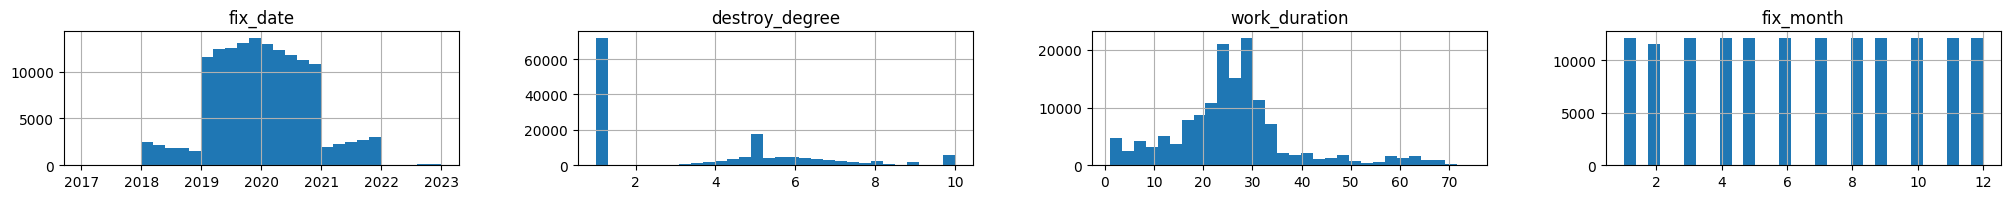

In [53]:
fix_info['fix_date'] = pd.to_datetime(fix_info['fix_date'], errors='coerce')
fix_info['fix_month'] = fix_info['fix_date'].dt.month

fix_info.hist(figsize=(25, 4), layout=(2, 4), bins=30);

In [54]:
#av_destrdegree_per_work_type = fix_info.groupby('work_type')['destroy_degree'].mean()
#fix_info['av_destrdegree_per_work_type'] = fix_info['work_type'].map(av_destrdegree_per_work_type)

fix_info["worker_experience"] = fix_info.groupby("worker_id")["car_id"].transform("count")

fix_info['work_meanduration_car'] = fix_info.groupby("car_id")["work_duration"].transform("mean")

fix_info['month_top_carfix'] = fix_info.groupby("car_id")["fix_month"].transform(lambda x: x.mode().iloc[0])

fix_info.sample(3)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,fix_month,worker_experience,work_meanduration_car,month_top_carfix
118033,J22037391Y,FO,2019-07-10 06:59:00,repair,6.5,27,7.0,255,28.558824,2.0
116650,R37055375H,TS,2020-08-25 18:23:00,reparking,1.0,31,8.0,282,26.235294,10.0
113092,i11748425a,UO,2019-11-08 03:42:00,reparking,1.0,23,11.0,273,25.117647,11.0


In [55]:
fix_info_m = fix_info.drop(columns=['worker_id', 'fix_month', 'fix_date', 'destroy_degree', 'work_duration', 'work_type'])

In [58]:
fix_info_agr = fix_info_m.groupby('car_id').agg({
   'worker_experience': 'mean',
   'work_meanduration_car': 'mean',
   'month_top_carfix': 'max'
}).reset_index()
fix_info_agr.sample(3)

,car_id,worker_experience,work_meanduration_car,month_top_carfix
3981,w17370680J,274.057143,28.514286,10.0
2250,b17685766M,267.823529,26.000000,11.0
2180,b-1232634R,271.705882,23.705882,1.0


In [59]:
base_dt = base_dt.merge(fix_info_agr, on='car_id', how="left")

### Информация про водителей

In [17]:
driver_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15153 non-null  int64  
 1   user_rating         15153 non-null  float64
 2   user_rides          15153 non-null  int64  
 3   user_time_accident  14182 non-null  float64
 4   user_id             15153 non-null  object 
 5   sex                 15153 non-null  int64  
 6   first_ride_date     15153 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 828.8+ KB


(user_id = 15153 - user_time_accident = 14182) / 15153 *100 = 6.4% - составляет значительную часть, но и сам признак user_time_accident является важным

In [18]:
driver_info = driver_info.dropna(subset=['user_time_accident']).reset_index(drop=True)

driver_info['first_ride_date'] = pd.to_datetime(driver_info['first_ride_date'], errors='coerce')

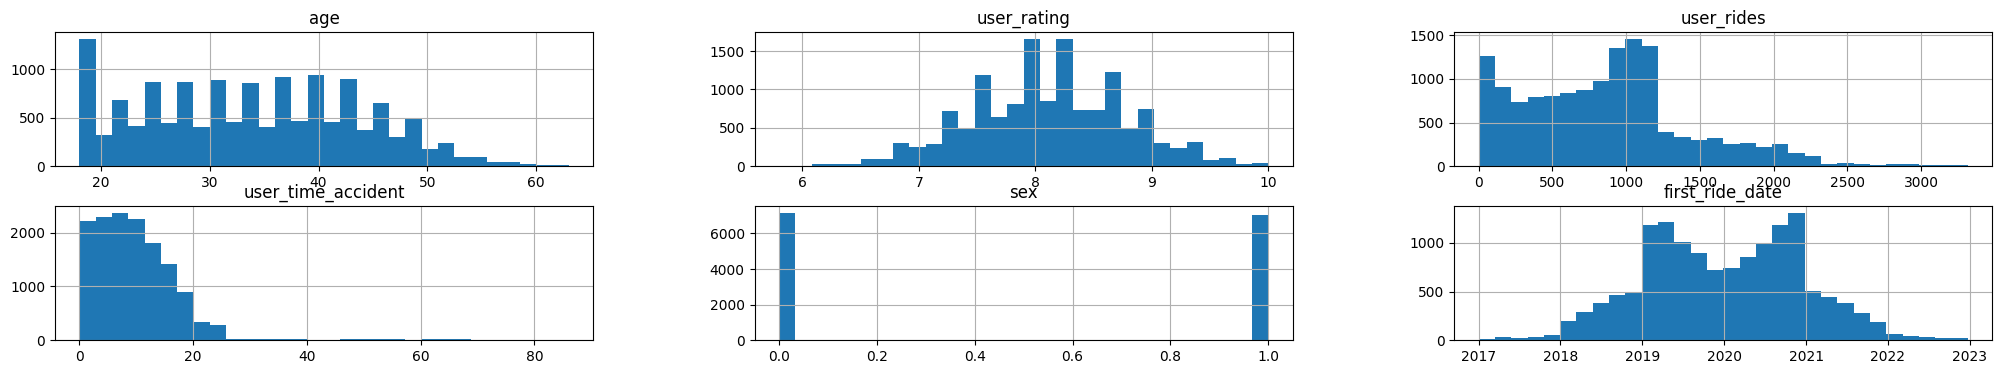

In [19]:
driver_info.hist(figsize=(25, 4), layout=(2, 3), bins=30);

In [20]:
from pandas import Timedelta

max_ride_date = driver_info['first_ride_date'].max() + Timedelta(days=1) # Макс дата начала использования сервиса водителем. Добавляю 1 день, чтобы избежать деления на 0 в driver_range

driver_info['driver_range'] = (max_ride_date - driver_info['first_ride_date']).dt.days 

driver_info['active_ride'] = driver_info['user_rides'] / driver_info['driver_range']

driver_info['accident_rate'] = driver_info['user_time_accident'] / driver_info['driver_range']
#driver_info['driver_range'] = driver_info['driver_range'].apply(get_range)

In [22]:
driver_info.sample(5)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date,driver_range,active_ride,accident_rate
8624,25,8.4,762,9.0,u88167236N,1,2020-09-02,844.0,0.902844,0.010664
5191,24,8.6,63,18.0,M10932668d,1,2020-02-27,1032.0,0.061047,0.017442
12093,18,8.4,950,9.0,E19408584w,1,2020-10-19,797.0,1.191970,0.011292
7353,48,7.5,31,6.0,Y29957117K,0,2019-11-23,1128.0,0.027482,0.005319
7038,42,8.6,715,17.0,t12994482H,0,2019-05-10,1325.0,0.539623,0.012830


In [21]:
driver_info_m = driver_info.drop(columns=['sex', 'age', 'user_rating', 'user_rides', 'user_time_accident', 'first_ride_date'])

In [22]:
driver_info_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14182 entries, 0 to 14181
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        14182 non-null  object 
 1   driver_range   14083 non-null  float64
 2   active_ride    14083 non-null  float64
 3   accident_rate  14083 non-null  float64
dtypes: float64(3), object(1)
memory usage: 443.3+ KB


In [23]:
driver_info_m = driver_info_m.dropna(subset=['driver_range', 'active_ride', 'accident_rate']).reset_index(drop=True)


In [60]:
pd.set_option('display.max_info_columns', 25)
base_dt.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_id                 2337 non-null   object 
 1   model                  2337 non-null   object 
 2   car_type               2337 non-null   object 
 3   fuel_type              2337 non-null   object 
 4   car_rating             2337 non-null   float64
 5   riders                 2337 non-null   int64  
 6   target_reg             2337 non-null   float64
 7   target_class           2337 non-null   object 
 8   total_car_age          2337 non-null   int64  
 9   servis_car_age         2337 non-null   int64  
 10  shift_car_devnorm      2337 non-null   float64
 11  min_car_rating         2337 non-null   float64
 12  mean_car_rating        2337 non-null   float64
 13  sum_car_distance       2337 non-null   float64
 14  max_car_speed          2337 non-null   float64
 15  coun

In [62]:
base_dt.to_csv('base_dt.csv', index=False)